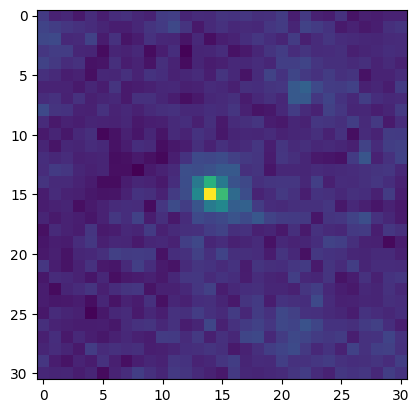

In [11]:
img = stacks[0][50]
plt.imshow(img)
plt.show()



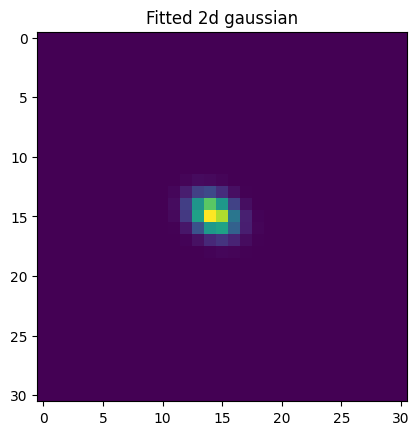

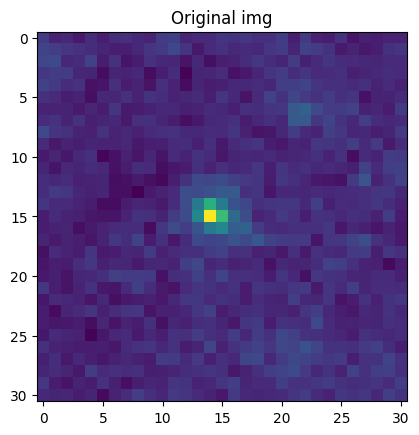

In [17]:
import numpy as np
from scipy.optimize import curve_fit 

def mse(pred, psf):
    return np.mean((pred-psf)**2)

def fit_gaussian(psf):
    psf_dim = psf.shape
    def gaussian_2d(coords, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
        (x, y) = coords
        xo = float(xo)
        yo = float(yo)    
        a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
        b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
        c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
        g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                                + c*((y-yo)**2)))
        return g.ravel()

    initial_amp = psf.max()
    initial_x0 = psf.shape[-1]//2
    initial_y0 = psf.shape[-2]//2
    sigma_x = initial_x0/10
    sigma_y = initial_y0/10
    theta = 1
    offset = psf.max() - psf.min()
    
    initial_guess = (initial_amp, initial_x0, initial_y0, sigma_x, sigma_y, theta, offset)

#     data_noisy = data + 0.2*np.random.normal(size=data.shape)
    
    x = np.linspace(0, psf.shape[0], psf.shape[0])
    y = np.linspace(0, psf.shape[1], psf.shape[1])
    x, y = np.meshgrid(x, y)
    
    popt, pcov = curve_fit(gaussian_2d, (x, y), psf.ravel(), p0=initial_guess, maxfev=10000)
    
    fitted = gaussian_2d((x, y), *popt).reshape(psf.shape)
    amplitude, x0, y0, sigma_x, sigma_y, theta, offset = popt
    
    
    plt.imshow(fitted)
    plt.title('Fitted 2d gaussian')
    plt.show()
    
    plt.imshow(psf)
    plt.title('Original img')
    plt.show()
    
fit_gaussian(img)